In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = [
    'office_caltech_10_FedAvg_16_10_0.01_0.005_4c_300r.h5',
    'office_caltech_10_FedBN_16_10_0.01_0.005_4c_300r.h5',
    'office_caltech_10_PerAvg_16_10_0.01_0.005_4c_300r.h5',
    'office_caltech_10_pFedInit_16_10_0.01_0.005_4c_300r.h5'
]
# label = ['FedAvg', 'Per-FedAvg(0.01)', 'Per-FedAvg(0.005)', 'pFedInit']
label = ['FedAvg', 'FedBN', 'Per-FedAvg', 'pFedInit']

colors = ['#1B1A17', '#0F4C75', '#E45826', '#B33030']

markers = ['x', 'D', 'o', 'P']

[0.08854167 0.08       0.0625     0.08474576] 0.75
[0.78125    0.52444444 0.75       0.74576271] 0.75
[0.82291667 0.56888889 0.90625    0.84745763] 0.75
[0.82291667 0.57777778 0.71875    0.96610169] 0.75
[0.69270833 0.52444444 0.84375    0.94915254] 0.75
[0.84375    0.60444444 0.8125     0.88135593] 0.75
[0.84895833 0.6        0.84375    0.94915254] 0.75
[0.08854167 0.08       0.0625     0.08474576] 0.7263779527559056
[0.765625   0.50666667 0.625      0.71186441] 0.7263779527559056
[0.80208333 0.56       0.875      0.88135593] 0.7263779527559056
[0.83854167 0.55111111 0.8125     0.86440678] 0.7263779527559056
[0.859375   0.56444444 0.875      0.83050847] 0.7263779527559056
[0.78645833 0.59111111 0.8125     0.86440678] 0.7263779527559056
[0.828125   0.59111111 0.8125     0.84745763] 0.7263779527559056
[0.16666667 0.09777778 0.0625     0.16949153] 0.8307086614173228
[0.75520833 0.54222222 0.6875     0.79661017] 0.8307086614173228
[0.85416667 0.58666667 0.96875    0.94915254] 0.8307086614

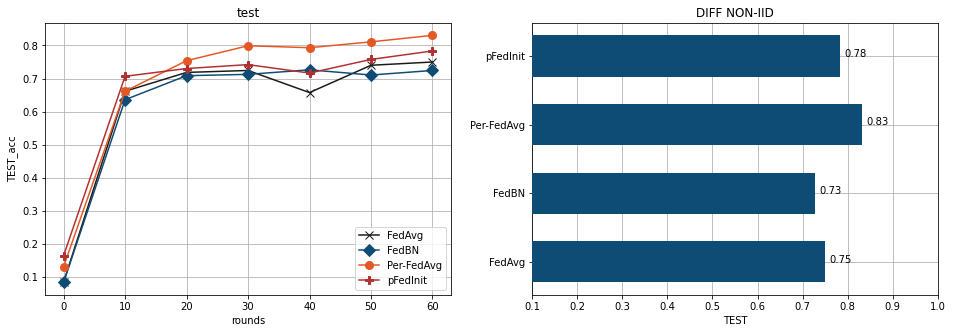

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))


max_testacc = []

for path, lab, col, mk in zip(data_path, label, colors, markers):
    data = h5py.File(path, 'r')
    losses = data['rs_train_loss'][::]
    train_acc = data['rs_train_acc'][::]
    test_acc = data['rs_glob_acc'][::]
    

    client_acc = data['rs_client_acc'][::]

    for rnd in client_acc:
        # test_acc.append(np.mean(rnd))
        print(rnd, np.max(test_acc))
    
    max_testacc.append(np.max(test_acc))
    
    x = [i*10 for i in range(len(losses+1))]

    ax1.plot(x, test_acc, label = lab, color=col, marker=mk, markevery=1, markersize=8)


ax1.set_xlabel("rounds")
ax1.set_ylabel("TEST_acc")
ax1.set_title('test')

ax2.set_xlim(0.1, 1.0)
ax2.barh(range(len(data_path)), max_testacc, height=0.6, color='#0F4C75', zorder=10)
ax2.set_yticks(range(len(data_path)), label[:len(data_path)])
ax2.set_xlabel("TEST")
ax2.set_title("DIFF NON-IID")

for x, y in enumerate(max_testacc):
    ax2.text(y + 0.01, x-0.01, '%s' % (np.round(y, decimals=2)))


ax1.grid()
ax1.legend()
ax2.grid(zorder=0)
plt.savefig('femnist_acc_niid_comp.pdf', dpi=600, pad_inches = 0)